In [55]:
import sys
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib
from threading import Thread
from queue import Queue
import math
import requests
import time 
from datetime import timedelta
import pickle
from datetime import datetime

In [56]:
import matplotlib.pyplot as plt

In [57]:
import seaborn as sns
sns.set(color_codes=True)

In [60]:
df = pd.DataFrame(columns=['author','date','activity', 'text', 'files'])
filne = "log_reveal.txt"
##with urllib2.urlopen("https://file.io/rSWakX") as f:
with open(filne, 'r+', encoding="utf-8") as f:
    lines = f.readlines()
    ##for i in range(0, 100):
  
    for i in range(0, len(lines)):
        line = lines[i]
        if line[:6] == "commit":
            sha = line[7:].strip()
            ##Author
            line = lines[i+1]
            if line[:6] == "Merge:":
                i = i + 1
                line = lines[i+1]
            divided = line.split("<")
            divided[1][:-2]          
            author = divided[1][:-2]
            ##Author
            line = lines[i+2]
            divided = line.split(":   ")
            date = divided[1].strip()
            line = lines[i+3]  
            text = ""
            if line in ['\n', '\r\n']:
                line = lines[i + 4]
                divided = line.split(":")
                activity = divided[0].strip()
            j = 5
            text += line
            while 1:
                line = lines[i+j]            
                if line in ['\n', '\r\n']:
                    break
                text += line    
                j = j + 1
            j = j + 1
            files = []
            while 1:
                line = lines[i+j]            
                if line in ['\n', '\r\n']:
                    break
                files.append(line)   
                j = j + 1
            print("...........")
            ##print sha
            ##print author
            ##print date
            ##print activity
            ##print files
            print(text)
            df.loc[sha] = pd.Series({'author': author, 'date': date, 'activity': activity, 'text': text, 'files': files})
        


...........
    fix unclosed code block

...........
    3.4.0

...........
    Merge branch 'dev' of github.com:hakimel/reveal.js

...........
    fragments inherit visibility to avoid conflicts with parent slide visibility

...........
    don't show error message while iframe fades in #1577

...........
    Merge branch 'add-refused-to-display-tips-to-link-preview' of https://github.com/Huxpro/reveal.js into dev

...........
    always use lowercase reveal.js

...........
    Merge pull request #1767 from demoneaux/readme
    
    Add note about head.js to readme.

...........
    Add note about head.js to readme.
    
    Closes #1569.

...........
    Enable passing options for parsing Markdown.
    
    Closes #1163, #1495.

...........
    Reduce required Node.js version to 4.0.0.
    
    The development workflow can be used with Node 4+, not just Node 6. We
    should avoid showing warnings and errors when users are installing this
    package via npm/yarn.
    
    Ref. #1729

IndexError: list index out of range

In [61]:
df.head()

,author,date,activity,text,files
568c7516f7ff7da7824db033946619d2c7ad761f,hakim.elhattab@gmail.com,Tue Jan 10 14:43:47 2017,fix unclosed code block,fix unclosed code block\n,"[ README.md | 3 ++-\n, 1 file changed, 2 inse..."
fb8414f4cb092a9f675e783b29b651a03a7858f4,hakim.elhattab@gmail.com,Tue Jan 10 13:47:24 2017,3.4.0,3.4.0\n,"[ bower.json | 2 +-\n, js/reveal.js | 2 +-\..."
a144134b42c15964f469cf4499859268f52ccb46,hakim.elhattab@gmail.com,Tue Jan 10 13:45:52 2017,Merge branch 'dev' of github.com,Merge branch 'dev' of github.com:hakimel/r...,[commit 97bb6e9b584f6b4eee33c91e04e5a40da358b7...
97bb6e9b584f6b4eee33c91e04e5a40da358b7cd,hakim.elhattab@gmail.com,Thu Dec 15 14:06:17 2016,fragments inherit visibility to avoid conflict...,fragments inherit visibility to avoid conf...,"[ css/reveal.css | 18 +++++++++---------\n, ..."
f2bd9d297018e1af97ebee147a8824bfb61c2bed,hakim.elhattab@gmail.com,Tue Dec 13 16:16:51 2016,don't show error message while iframe fades in...,don't show error message while iframe fade...,"[ css/reveal.css | 18 ++++++++++++++++++\n, ..."


In [62]:
len(df)

1900

In [63]:
df['changes'] = pd.Series(df['files'].str[-1], index=df.index)

In [64]:
df['n_files'] = pd.Series(df['changes'].str.split().str[0] , index=df.index)
df['insertions'] = pd.Series(df['changes'].str.split(",").str[1].str.split().str[0] , index=df.index)
df['deletions'] = pd.Series(df['changes'].str.split(",").str[2].str.split().str[0] , index=df.index)


In [65]:
del df['changes']
df.head()

,author,date,activity,text,files,n_files,insertions,deletions
568c7516f7ff7da7824db033946619d2c7ad761f,hakim.elhattab@gmail.com,Tue Jan 10 14:43:47 2017,fix unclosed code block,fix unclosed code block\n,"[ README.md | 3 ++-\n, 1 file changed, 2 inse...",1,2,1
fb8414f4cb092a9f675e783b29b651a03a7858f4,hakim.elhattab@gmail.com,Tue Jan 10 13:47:24 2017,3.4.0,3.4.0\n,"[ bower.json | 2 +-\n, js/reveal.js | 2 +-\...",3,3,3
a144134b42c15964f469cf4499859268f52ccb46,hakim.elhattab@gmail.com,Tue Jan 10 13:45:52 2017,Merge branch 'dev' of github.com,Merge branch 'dev' of github.com:hakimel/r...,[commit 97bb6e9b584f6b4eee33c91e04e5a40da358b7...,Date:,NaN,NaN
97bb6e9b584f6b4eee33c91e04e5a40da358b7cd,hakim.elhattab@gmail.com,Thu Dec 15 14:06:17 2016,fragments inherit visibility to avoid conflict...,fragments inherit visibility to avoid conf...,"[ css/reveal.css | 18 +++++++++---------\n, ...",2,18,18
f2bd9d297018e1af97ebee147a8824bfb61c2bed,hakim.elhattab@gmail.com,Tue Dec 13 16:16:51 2016,don't show error message while iframe fades in...,don't show error message while iframe fade...,"[ css/reveal.css | 18 ++++++++++++++++++\n, ...",3,28,2


In [66]:
df['n_files'] = df.n_files.apply(pd.to_numeric, args=('coerce',))
df['insertions'] = df.insertions.apply(pd.to_numeric, args=('coerce',))
df['deletions'] = df.deletions.apply(pd.to_numeric, args=('coerce',))


In [67]:
df.head()

,author,date,activity,text,files,n_files,insertions,deletions
568c7516f7ff7da7824db033946619d2c7ad761f,hakim.elhattab@gmail.com,Tue Jan 10 14:43:47 2017,fix unclosed code block,fix unclosed code block\n,"[ README.md | 3 ++-\n, 1 file changed, 2 inse...",1.0,2.0,1.0
fb8414f4cb092a9f675e783b29b651a03a7858f4,hakim.elhattab@gmail.com,Tue Jan 10 13:47:24 2017,3.4.0,3.4.0\n,"[ bower.json | 2 +-\n, js/reveal.js | 2 +-\...",3.0,3.0,3.0
a144134b42c15964f469cf4499859268f52ccb46,hakim.elhattab@gmail.com,Tue Jan 10 13:45:52 2017,Merge branch 'dev' of github.com,Merge branch 'dev' of github.com:hakimel/r...,[commit 97bb6e9b584f6b4eee33c91e04e5a40da358b7...,NaN,NaN,NaN
97bb6e9b584f6b4eee33c91e04e5a40da358b7cd,hakim.elhattab@gmail.com,Thu Dec 15 14:06:17 2016,fragments inherit visibility to avoid conflict...,fragments inherit visibility to avoid conf...,"[ css/reveal.css | 18 +++++++++---------\n, ...",2.0,18.0,18.0
f2bd9d297018e1af97ebee147a8824bfb61c2bed,hakim.elhattab@gmail.com,Tue Dec 13 16:16:51 2016,don't show error message while iframe fades in...,don't show error message while iframe fade...,"[ css/reveal.css | 18 ++++++++++++++++++\n, ...",3.0,28.0,2.0


In [68]:
pattern_code = ".*\.awk(~?)|.*\.scm(~?)|.*\.glsl(~?)|.*\.patch(~?)|.*\.c((\.swp)?)(~?)|.*/script(s?)/.*|.*\.jar(~?)|.*/src/.*|.*\.m((\.swp)?)(~?)|.*\.cs(~?)|.*\.idl(~?)|.*\.s(~?)|.*\.r((\.swp)?)(~?)|.*\.cxx(~?)|.*\.pyc(~?)|.*\.asm(x?)(~?)|.*\.py((\.swp)?)(~?)|.*\.y((\.swp)?)(~?)|.*\.gi((\.swp)?)(∼?)|.*\.t((\.swp)?)(~?)|.*\.dll(~?)|.*\.h˙template((\.swp)?)(∼?)|.*\.js((\.swp)?)(~?)|.*\.rb((\.swp)?)(~?)|.*\.c˙template((\.swp)?)(∼ ?)|.*\.hg((\.swp)?)(~?)|.*\.pm((\.swp)?)(~?)|.*\.php((\.swp)?)(\d?)(∼ ?)|.*\.cc((\.swp)?)(~?)|.*\.sh((\.swp)?)(~?)|.*\.php((\.swp)?)(\d?)(∼ ?)|.*\.el((\.swp)?)(~?)|.*\.hh((\.swp)?)(~?)|.*\.h((pp)?)((\.swp)?)(∼ ?)|.*\.xs((\.swp)?)(~?)|.*\.pl((\.swp)?)(~?)|.*\.h\.tmpl((\.swp)?)(∼?)|.*\.mm((\.swp)?)(~?)|.*\.idl((\.swp)?)(~?)|.*\.h.win32((\.swp)?)(∼ ?)|.*\.xpt((\.swp)?)(~?)|.*\.ccg((\.swp)?)(~?)|.*\.c˙tmpl((\.swp)?)(∼?)|.*\.snk((\.swp)?)(~?)|.*\.inc((\.swp)?)(~?)|.*\.asp(x?)((\.swp)?)(∼ ?)|.*\.cpp((\.swp)?)(~?)|.*\.gob((\.swp)?)(~?)|.*\.vapi((\.swp)?)(∼?)|.*\.giv((\.swp)?)(~?)|.*\.dtd((\.swp)?)(~?)|.*\.gidl((\.swp)?)(∼?)|.*\.giv((\.swp)?)(~?)|.*\.ada((\.swp)?)(~?)|.*\.defs((\.swp)?)(∼?)|.*\.tcl((\.swp)?)(~?)|.*\.vbs((\.swp)?)(~?)|.*\.java((\.swp)?)(∼?)|.*\.nib((\.swp)?)(~?)|.*\.sed((\.swp)?)(~?)|.*\.vala((˙swp)?)(∼?)"
pattern_doc = "|.*\.zabw|.*/potfiles|.*/install|.*\.wml|.*\.chm|.*\.ods|.*/copyright|.*/version|.*\.css|.*\.vcard(~?)|.*/plan|.*/feature(s?)|.*\.txt((\.bak)?)|.*/credits|.*/notes|.*/licence|.*\.txt((\.old)?)|.*\.man|.*/howto|.*/license|.*\.rtf|.*\.ics|.*/faq|.*/maintainers|.*\.tex|.*/documenters|.*copying|.*/copying|.*\.sgml|.*\.gnumeric|.*/copying.*|.*/committers|.*\.eps|.*\.vcf|.*/doc(s?)/.*|.*/thanks|.*\.xsd|.*\.schemas|.*/help(s?)/.*|.*/authors|.*\.texi|.*\.doc|.*/bugs|.*\.docx"
pattern_test = ".*\.test(s?)/.*|.*/.*test\..*|.*/test.*\..*"
pattern_build = "|.*\.m4(~?)|.*makefile.*|.*\.prj|.*\.plo|.*\.mk|.*\.make|.*\.deps|.*\.wxiproj|.*\.am(~?)|.*\.mp4|.*\.builder|.*\.lo|.*\.target|.*\.iss|.*\.nsi|.*\.wxi|.*/configure((\..+)?)|.*\.wxs|.*/mkbundle\..+|.*\.in|.*/autogen\.((.+\.)?)sh|.*\.wpj|.*\.vc(x?)proj(i?)n((\.filters((in)?))?)|.*\.vcproj((\.filters((in)?))?)"

In [69]:
df['pat_code'] = 0
df['pat_doc'] = 0
df['pat_test'] = 0
df['pat_build'] = 0
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build
568c7516f7ff7da7824db033946619d2c7ad761f,hakim.elhattab@gmail.com,Tue Jan 10 14:43:47 2017,fix unclosed code block,fix unclosed code block\n,"[ README.md | 3 ++-\n, 1 file changed, 2 inse...",1.0,2.0,1.0,0,0,0,0
fb8414f4cb092a9f675e783b29b651a03a7858f4,hakim.elhattab@gmail.com,Tue Jan 10 13:47:24 2017,3.4.0,3.4.0\n,"[ bower.json | 2 +-\n, js/reveal.js | 2 +-\...",3.0,3.0,3.0,0,0,0,0
a144134b42c15964f469cf4499859268f52ccb46,hakim.elhattab@gmail.com,Tue Jan 10 13:45:52 2017,Merge branch 'dev' of github.com,Merge branch 'dev' of github.com:hakimel/r...,[commit 97bb6e9b584f6b4eee33c91e04e5a40da358b7...,NaN,NaN,NaN,0,0,0,0
97bb6e9b584f6b4eee33c91e04e5a40da358b7cd,hakim.elhattab@gmail.com,Thu Dec 15 14:06:17 2016,fragments inherit visibility to avoid conflict...,fragments inherit visibility to avoid conf...,"[ css/reveal.css | 18 +++++++++---------\n, ...",2.0,18.0,18.0,0,0,0,0
f2bd9d297018e1af97ebee147a8824bfb61c2bed,hakim.elhattab@gmail.com,Tue Dec 13 16:16:51 2016,don't show error message while iframe fades in...,don't show error message while iframe fade...,"[ css/reveal.css | 18 ++++++++++++++++++\n, ...",3.0,28.0,2.0,0,0,0,0


In [70]:
import re
for index, row in df.iterrows():
    code = 0
    doc = 0
    test = 0
    build = 0
    for j in range(0, len(row['files'])):
        match_code = re.match(pattern_code, row['files'][j], flags=0)
        if match_code:
            code += 1
        match_doc = re.match(pattern_doc, row['files'][j], flags=0)
        if match_doc:
            doc += 1
        match_test = re.match(pattern_test, row['files'][j], flags=0)
        if match_test:
            test += 1
        match_build = re.match(pattern_build, row['files'][j], flags=0)
        if match_build:
            build += 1
    
    df.set_value(index, 'pat_code', code) 
    df.set_value(index, 'pat_doc', doc) 
    df.set_value(index, 'pat_test', test) 
    df.set_value(index, 'pat_build', build) 
df.head()
    

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build
568c7516f7ff7da7824db033946619d2c7ad761f,hakim.elhattab@gmail.com,Tue Jan 10 14:43:47 2017,fix unclosed code block,fix unclosed code block\n,"[ README.md | 3 ++-\n, 1 file changed, 2 inse...",1.0,2.0,1.0,1,2,0,2
fb8414f4cb092a9f675e783b29b651a03a7858f4,hakim.elhattab@gmail.com,Tue Jan 10 13:47:24 2017,3.4.0,3.4.0\n,"[ bower.json | 2 +-\n, js/reveal.js | 2 +-\...",3.0,3.0,3.0,3,4,0,4
a144134b42c15964f469cf4499859268f52ccb46,hakim.elhattab@gmail.com,Tue Jan 10 13:45:52 2017,Merge branch 'dev' of github.com,Merge branch 'dev' of github.com:hakimel/r...,[commit 97bb6e9b584f6b4eee33c91e04e5a40da358b7...,NaN,NaN,NaN,1,3,0,3
97bb6e9b584f6b4eee33c91e04e5a40da358b7cd,hakim.elhattab@gmail.com,Thu Dec 15 14:06:17 2016,fragments inherit visibility to avoid conflict...,fragments inherit visibility to avoid conf...,"[ css/reveal.css | 18 +++++++++---------\n, ...",2.0,18.0,18.0,2,3,0,3
f2bd9d297018e1af97ebee147a8824bfb61c2bed,hakim.elhattab@gmail.com,Tue Dec 13 16:16:51 2016,don't show error message while iframe fades in...,don't show error message while iframe fade...,"[ css/reveal.css | 18 ++++++++++++++++++\n, ...",3.0,28.0,2.0,3,4,0,4


In [71]:
df.insertions.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    1550.000000
mean       31.772258
std       119.286064
min         0.000000
25%              NaN
50%              NaN
75%              NaN
max      2621.000000
Name: insertions, dtype: float64

In [72]:
comment_code = "(?:^|\W)cod(?:$|)"
comment_doc = "(?:^|\W)doc(?:$|)"
comment_test = "(?:^|\W)test(?:$|)"
comment_build = "(?:^|\W)build(?:$|)"


In [73]:
df['text_code'] = 0
df['text_doc'] = 0
df['text_test'] = 0
df['text_build'] = 0

In [74]:
match_code = re.findall(comment_code, df['text'][1], re.IGNORECASE)
match_doc = re.findall(comment_doc, df['text'][1], re.IGNORECASE)
match_test = re.findall(comment_test, df['text'][1], re.IGNORECASE)
match_build = re.findall(comment_build, df['text'][1], re.IGNORECASE)


In [75]:
for index, row in df.iterrows():   
    match_code = re.findall(comment_code, row['text'], re.IGNORECASE)
    match_doc = re.findall(comment_doc, row['text'], re.IGNORECASE)
    match_test = re.findall(comment_test, row['text'], re.IGNORECASE)
    match_build = re.findall(comment_build, row['text'], re.IGNORECASE)

    df.set_value(index, 'text_code', len(match_code)) 
    df.set_value(index, 'text_doc', len(match_doc)) 
    df.set_value(index, 'text_test', len(match_test))
    df.set_value(index, 'text_build', len(match_build)) 
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build
568c7516f7ff7da7824db033946619d2c7ad761f,hakim.elhattab@gmail.com,Tue Jan 10 14:43:47 2017,fix unclosed code block,fix unclosed code block\n,"[ README.md | 3 ++-\n, 1 file changed, 2 inse...",1.0,2.0,1.0,1,2,0,2,1,0,0,0
fb8414f4cb092a9f675e783b29b651a03a7858f4,hakim.elhattab@gmail.com,Tue Jan 10 13:47:24 2017,3.4.0,3.4.0\n,"[ bower.json | 2 +-\n, js/reveal.js | 2 +-\...",3.0,3.0,3.0,3,4,0,4,0,0,0,0
a144134b42c15964f469cf4499859268f52ccb46,hakim.elhattab@gmail.com,Tue Jan 10 13:45:52 2017,Merge branch 'dev' of github.com,Merge branch 'dev' of github.com:hakimel/r...,[commit 97bb6e9b584f6b4eee33c91e04e5a40da358b7...,NaN,NaN,NaN,1,3,0,3,0,0,0,0
97bb6e9b584f6b4eee33c91e04e5a40da358b7cd,hakim.elhattab@gmail.com,Thu Dec 15 14:06:17 2016,fragments inherit visibility to avoid conflict...,fragments inherit visibility to avoid conf...,"[ css/reveal.css | 18 +++++++++---------\n, ...",2.0,18.0,18.0,2,3,0,3,0,0,0,0
f2bd9d297018e1af97ebee147a8824bfb61c2bed,hakim.elhattab@gmail.com,Tue Dec 13 16:16:51 2016,don't show error message while iframe fades in...,don't show error message while iframe fade...,"[ css/reveal.css | 18 ++++++++++++++++++\n, ...",3.0,28.0,2.0,3,4,0,4,0,0,0,0


In [76]:
from textblob import TextBlob

In [77]:
df['subjectivity'] = 0
df['polarity'] = 0

In [78]:
for index, row in df.iterrows(): 
    textblob = TextBlob(row['text'])
    df.set_value(index, 'polarity', textblob.sentiment.polarity) 
    df.set_value(index, 'subjectivity', textblob.sentiment.subjectivity) 
df.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
568c7516f7ff7da7824db033946619d2c7ad761f,hakim.elhattab@gmail.com,Tue Jan 10 14:43:47 2017,fix unclosed code block,fix unclosed code block\n,"[ README.md | 3 ++-\n, 1 file changed, 2 inse...",1.0,2.0,1.0,1,2,0,2,1,0,0,0,0,0
fb8414f4cb092a9f675e783b29b651a03a7858f4,hakim.elhattab@gmail.com,Tue Jan 10 13:47:24 2017,3.4.0,3.4.0\n,"[ bower.json | 2 +-\n, js/reveal.js | 2 +-\...",3.0,3.0,3.0,3,4,0,4,0,0,0,0,0,0
a144134b42c15964f469cf4499859268f52ccb46,hakim.elhattab@gmail.com,Tue Jan 10 13:45:52 2017,Merge branch 'dev' of github.com,Merge branch 'dev' of github.com:hakimel/r...,[commit 97bb6e9b584f6b4eee33c91e04e5a40da358b7...,NaN,NaN,NaN,1,3,0,3,0,0,0,0,0,0
97bb6e9b584f6b4eee33c91e04e5a40da358b7cd,hakim.elhattab@gmail.com,Thu Dec 15 14:06:17 2016,fragments inherit visibility to avoid conflict...,fragments inherit visibility to avoid conf...,"[ css/reveal.css | 18 +++++++++---------\n, ...",2.0,18.0,18.0,2,3,0,3,0,0,0,0,0,0
f2bd9d297018e1af97ebee147a8824bfb61c2bed,hakim.elhattab@gmail.com,Tue Dec 13 16:16:51 2016,don't show error message while iframe fades in...,don't show error message while iframe fade...,"[ css/reveal.css | 18 ++++++++++++++++++\n, ...",3.0,28.0,2.0,3,4,0,4,0,0,0,0,0,0


In [79]:
df.polarity.describe()

count    1900.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: polarity, dtype: float64

In [80]:
print('Class                                                                                        Amount')
for i in range(1,10):
    classCount = df.activity.value_counts()
print(classCount)

Class                                                                                        Amount
Merge branch 'master' of github.com                                           52
Merge branch 'master' of https                                                21
Merge remote-tracking branch 'upstream/master'                                13
Merge branch 'patch-1' of https                                               13
Merge branch 'dev' of github.com                                              12
Update README.md                                                              12
readme update                                                                  7
new example                                                                    5
merge conflict                                                                 5
merge master into dev                                                          4
added example                                                                  4
code form

In [81]:
print('User                                 Count')
for i in range(1,10):
    classCount = df.author.value_counts()
print(classCount)

User                                 Count
hakim.elhattab@gmail.com                   1426
vonc@laposte.net                             29
mail@michael-kuehnel.de                      28
hakim@squarespace.com                        20
lawrencc@debian.org                          16
rmurphey@gmail.com                           12
david@banham.id.au                           12
ddascalescu+github@gmail.com                 11
rory.cronin-hardy@cerner.com                 11
stereotypicalapps@live.com                    9
demoneaux@gmail.com                           7
alexbatista.asb@gmail.com                     7
4sm0d3us@gmail.com                            6
hack@delley.net                               5
guillaume.turri@gmail.com                     5
fabianorosas@gmail.com                        5
aa@bb.cc                                      4
josh@technicalpickles.com                     4
david.banham@gmail.com                        4
owen.versteeg@live.com                       

In [82]:
x = {'Count': pd.Series(df.activity.value_counts())
     }
activity_count = pd.DataFrame(x)
activity_count.head()






                    
                    


,Count
Merge branch 'master' of github.com,52
Merge branch 'master' of https,21
Merge remote-tracking branch 'upstream/master',13
Merge branch 'patch-1' of https,13
Merge branch 'dev' of github.com,12


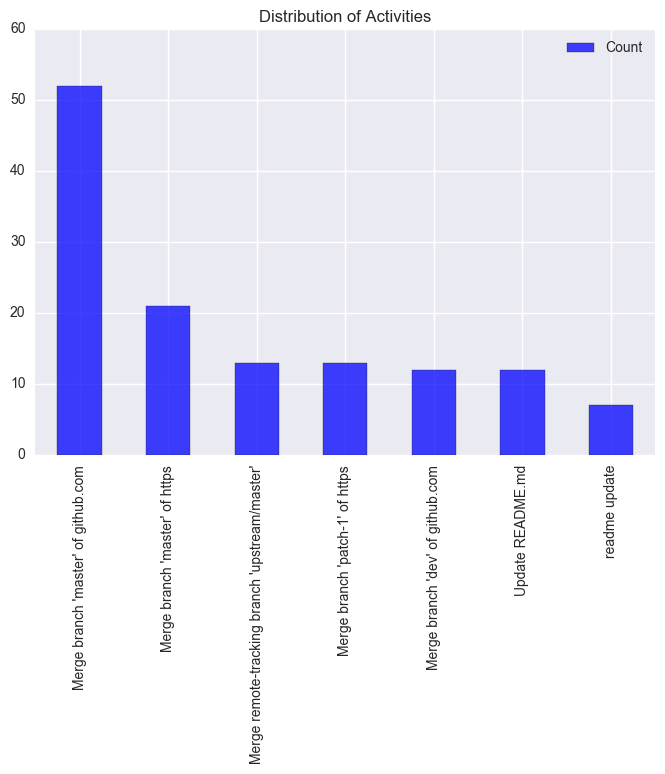

In [83]:
plt.figure(figsize=(18,10))
activity_count.query('Count > 5').plot(kind='bar', color="blue", alpha=.75)
plt.title("Distribution of Activities")
plt.show()

In [84]:
#####################

In [85]:
#####################

In [86]:
############################

In [87]:
dfTest = df[df.activity.isin(["Build","Tests", "Docs", "Release", "Core"])] 

In [88]:
dfTest.describe()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
dfTest['deletions'] = dfTest['deletions'].fillna('0')


In [90]:
##LEAVE THINGS ABOVE, BUT NOT RUN THEM

In [91]:
#######

In [92]:
#######

In [93]:
#######

In [94]:
#######

In [95]:
#######

In [96]:
from sklearn import cross_validation
from sklearn.preprocessing import *
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import *
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import *
from sklearn.cross_validation import KFold
import random

In [97]:
dfTest = pd.read_csv('jQuery_Training.csv', index_col=0, encoding="utf-8")
dfFinal = dfTest.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)
X = dfFinal.values
y = dfTest.activity.values

In [98]:
dfTest.head()

,author,date,activity,text,files,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
8816caf26c0acc7067cd5bad9c03cfb54e54979,alex@louden.com,Thu Jan 5 16:49:02 2017 +0800,Docs,Docs: Correct typo in issue template\r\n,"[' .github/ISSUE_TEMPLATE.md | 2 +-\n', ' 1 fi...",1.0,1.0,1.0,1,2,0,2,0,1,0,0,0,0
10ac0e532a9376106c50f0c21a0d0fd0483b700,m.goleb@gmail.com,Fri Dec 30 12:17:00 2016 +0100,Build,Build: Drop support for building on Node.j...,"[' .travis.yml | 1 -\n', ' Gruntfile.js | 39...",2.0,11.0,29.0,2,3,0,3,0,0,1,2,0,0
d9145fa15d91ab6c804161ecd892d4d08b71aa2,broder93@gmail.com,Sat Dec 24 10:33:27 2016 +0000,Tests,Tests: Added tests for symbol-separated ta...,[' test/unit/core.js | 27 ++++++++++++++++++--...,1.0,18.0,9.0,1,2,0,2,0,0,2,0,0,0
cb4cd71ef018854f75646270bacd4c4d3da9cde,richard.gibson@gmail.com,Mon Dec 19 11:58:48 2016 -0500,Build,Build: Use valid ecmaVersion\r\n \r\n ...,[' test/node_smoke_tests/.eslintrc.json | 2 +-...,1.0,1.0,1.0,1,2,0,2,0,0,1,1,0,0
754e315f8a7760bcdc162712d2be7fee058fdc2,m.goleb@gmail.com,Wed Nov 30 15:32:29 2016 +0100,Build,Build: Add most of the dist folder to .esl...,"[' .eslintignore | 2 ++\n', ' 1 file changed, ...",1.0,2.0,0.0,0,2,0,2,0,0,0,1,0,0


In [99]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.25)
y_train

array(['Release', 'Docs', 'Build', 'Build', 'Build', 'Build', 'Tests',
       'Build', 'Core', 'Build', 'Build', 'Tests', 'Tests', 'Tests',
       'Build', 'Tests', 'Build', 'Build', 'Core', 'Tests', 'Build',
       'Build', 'Tests', 'Tests', 'Build', 'Core', 'Tests', 'Core',
       'Tests', 'Build', 'Build', 'Docs', 'Tests', 'Tests', 'Build',
       'Tests', 'Tests', 'Tests', 'Core', 'Release', 'Build', 'Tests',
       'Build', 'Build', 'Tests', 'Build', 'Build', 'Release', 'Build',
       'Docs', 'Core', 'Tests', 'Tests', 'Tests', 'Core', 'Release',
       'Docs', 'Build', 'Build', 'Core', 'Release', 'Docs', 'Core', 'Core',
       'Tests', 'Tests', 'Build', 'Tests', 'Build', 'Build', 'Tests',
       'Tests', 'Docs', 'Release', 'Build', 'Tests', 'Build', 'Core',
       'Build', 'Build', 'Build', 'Build', 'Build', 'Build', 'Tests',
       'Build', 'Core', 'Build', 'Core', 'Build', 'Build', 'Build',
       'Build', 'Tests', 'Docs', 'Tests', 'Tests', 'Build', 'Build',
       'Tests', 'Bu

In [100]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


'accuracy: 81.1 percent'

In [101]:
df.describe()

D:\Anaconda\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,1550.000000,1550.000000,1310.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.0
mean,1.992258,31.772258,19.685496,1.576842,3.037368,0.044211,3.037368,0.045263,0.026842,0.037368,0.007368,0.028421,0.0
std,2.119708,119.286064,72.546228,1.790176,1.925460,0.279440,1.925460,0.215399,0.164890,0.236646,0.085545,0.166216,0.0
min,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,NaN,NaN,NaN,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,NaN,NaN,NaN,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,NaN,NaN,NaN,2.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,31.000000,2621.000000,1281.000000,19.000000,32.000000,4.000000,32.000000,3.000000,2.000000,4.000000,1.000000,1.000000,0.0


In [102]:
dfComplete = df.copy()
dfComplete['deletions'] = dfComplete['deletions'].fillna(0)
dfComplete['n_files'] = dfComplete['n_files'].fillna(0)
dfComplete['insertions'] = dfComplete['insertions'].fillna(0)
dfComplete.describe()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.0
mean,1.625263,25.919474,13.572632,1.576842,3.037368,0.044211,3.037368,0.045263,0.026842,0.037368,0.007368,0.028421,0.0
std,2.064416,108.436174,60.916499,1.790176,1.925460,0.279440,1.925460,0.215399,0.164890,0.236646,0.085545,0.166216,0.0
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,4.000000,2.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2.000000,17.000000,7.000000,2.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,31.000000,2621.000000,1281.000000,19.000000,32.000000,4.000000,32.000000,3.000000,2.000000,4.000000,1.000000,1.000000,0.0


In [103]:
dfCompleteX = dfComplete.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)

In [104]:
dfCompleteX.head()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
568c7516f7ff7da7824db033946619d2c7ad761f,1.0,2.0,1.0,1,2,0,2,1,0,0,0,0,0
fb8414f4cb092a9f675e783b29b651a03a7858f4,3.0,3.0,3.0,3,4,0,4,0,0,0,0,0,0
a144134b42c15964f469cf4499859268f52ccb46,0.0,0.0,0.0,1,3,0,3,0,0,0,0,0,0
97bb6e9b584f6b4eee33c91e04e5a40da358b7cd,2.0,18.0,18.0,2,3,0,3,0,0,0,0,0,0
f2bd9d297018e1af97ebee147a8824bfb61c2bed,3.0,28.0,2.0,3,4,0,4,0,0,0,0,0,0


In [105]:
dfComplete["predicted"] = clf.predict(dfCompleteX)

In [106]:
dfComplete.describe()

,n_files,insertions,deletions,pat_code,pat_doc,pat_test,pat_build,text_code,text_doc,text_test,text_build,subjectivity,polarity
count,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.000000,1900.0
mean,1.625263,25.919474,13.572632,1.576842,3.037368,0.044211,3.037368,0.045263,0.026842,0.037368,0.007368,0.028421,0.0
std,2.064416,108.436174,60.916499,1.790176,1.925460,0.279440,1.925460,0.215399,0.164890,0.236646,0.085545,0.166216,0.0
min,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,4.000000,2.000000,1.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,2.000000,17.000000,7.000000,2.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,31.000000,2621.000000,1281.000000,19.000000,32.000000,4.000000,32.000000,3.000000,2.000000,4.000000,1.000000,1.000000,0.0


In [107]:
x = {'Count': pd.Series(dfComplete.predicted.value_counts())
     }
activity_count = pd.DataFrame(x)
activity_count.head()

,Count
Core,1783
Tests,53
Docs,50
Build,14


In [108]:
dfComplete[["activity", "predicted"]]

,activity,predicted
568c7516f7ff7da7824db033946619d2c7ad761f,fix unclosed code block,Core
fb8414f4cb092a9f675e783b29b651a03a7858f4,3.4.0,Core
a144134b42c15964f469cf4499859268f52ccb46,Merge branch 'dev' of github.com,Core
97bb6e9b584f6b4eee33c91e04e5a40da358b7cd,fragments inherit visibility to avoid conflict...,Core
f2bd9d297018e1af97ebee147a8824bfb61c2bed,don't show error message while iframe fades in...,Core
001d4d94d30dffc3e82a7be0300147f755618aa4,Merge branch 'add-refused-to-display-tips-to-l...,Core
40c4db1e04113f317048e8e97479b4fb3e3eb863,always use lowercase reveal.js,Core
63d3b59ab20330854b850324c013f86c262fda18,Merge pull request #1767 from demoneaux/readme,Core
4d0f1adc400540cf2da9baca24085252e65378bb,Add note about head.js to readme.,Core
90b301d0a03b8b23ce755c31ec6dac15cf69dc49,Enable passing options for parsing Markdown.,Core


In [109]:
dfTest2 = pd.read_csv('nodejs_Training.csv', index_col=0, encoding="utf-8")
dfFinal2 = dfTest2.drop("activity", 1).drop("files", 1).drop("text", 1).drop("date", 1).drop("author", 1)
X = dfFinal2.values
y = dfTest2.activity.values
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y)
clf2 = LinearDiscriminantAnalysis()
clf2.fit(X_train, y_train)
dfComplete["predicted2"] = clf2.predict(dfCompleteX)
dfComplete[["activity", "predicted", "predicted2"]]

D:\Anaconda\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,activity,predicted,predicted2
568c7516f7ff7da7824db033946619d2c7ad761f,fix unclosed code block,Core,src
fb8414f4cb092a9f675e783b29b651a03a7858f4,3.4.0,Core,src
a144134b42c15964f469cf4499859268f52ccb46,Merge branch 'dev' of github.com,Core,src
97bb6e9b584f6b4eee33c91e04e5a40da358b7cd,fragments inherit visibility to avoid conflict...,Core,src
f2bd9d297018e1af97ebee147a8824bfb61c2bed,don't show error message while iframe fades in...,Core,src
001d4d94d30dffc3e82a7be0300147f755618aa4,Merge branch 'add-refused-to-display-tips-to-l...,Core,src
40c4db1e04113f317048e8e97479b4fb3e3eb863,always use lowercase reveal.js,Core,src
63d3b59ab20330854b850324c013f86c262fda18,Merge pull request #1767 from demoneaux/readme,Core,src
4d0f1adc400540cf2da9baca24085252e65378bb,Add note about head.js to readme.,Core,src
90b301d0a03b8b23ce755c31ec6dac15cf69dc49,Enable passing options for parsing Markdown.,Core,src


In [110]:
def accuracy_dist(name, x, y, dfComplete):
    print("----")
    print(name)
    correct = len(dfComplete[dfComplete.predicted.isin([x])][dfComplete.predicted2.isin([y])])
    wrong = len(dfComplete[dfComplete.predicted.isin([x])][~dfComplete.predicted2.isin([y])]) + len(dfComplete[~dfComplete.predicted.isin([x])][dfComplete.predicted2.isin([y])])
    print(correct/(correct + wrong))
    print("Same")
    print(correct)
    print("Different")
    print(wrong)
    print("----")
accuracy_dist("CORE",  "Core", "src", dfComplete)
accuracy_dist("BUILD", "Build", "build", dfComplete)
accuracy_dist("DOCS",  "Docs", "doc", dfComplete)
accuracy_dist("TEST", "Tests", "test",  dfComplete)

----
CORE
0.9697309417040358
Same
1730
Different
54
----
----
BUILD
0.9285714285714286
Same
13
Different
1
----
----
DOCS
0.96
Same
48
Different
2
----
----
TEST
0.9285714285714286
Same
52
Different
4
----


D:\Anaconda\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
D:\Anaconda\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [111]:
dfComplete[["activity", "predicted", "predicted2"]].sample(100).to_csv('reveal100.csv', encoding="utf-8")

In [112]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(dfComplete, alpha=0.2, figsize=(10, 10), diagonal='kde')
plt.show()

D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3040: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


LinAlgError: singular matrix

In [ ]:
clf = GaussianNB()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [ ]:
clf = KNeighborsClassifier()
clf.fit(X_train_sc, y_train)
accuracy = clf.score(X_test_sc, y_test)
"accuracy: %.1f percent"%(100*accuracy)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
"accuracy: %.1f percent"%(100*accuracy)

In [ ]:
def accuracy_dist(clfs, X, y, n=10):
    accuracy = np.zeros((n,len(clfs)))
    columns = [clf.__class__.__name__ for clf in clfs]
    for i in range(n):
        X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, random_state=31*i)
        for j in range(len(clfs)):
            clf = clfs[j]
            clf.fit(X_train,y_train)
            accuracy[i][j] = clf.score(X_test,y_test)
    return pd.DataFrame(accuracy, columns=columns, index=range(n))

In [ ]:
accuracy_df = accuracy_dist([GaussianNB(),LinearDiscriminantAnalysis(),LogisticRegression()], X, y)
accuracy_df = pd.concat(
    (accuracy_df, accuracy_dist([KNeighborsClassifier()], StandardScaler().fit_transform(X), y)), axis=1)
accuracy_df.plot(kind='kde', ylim=[0,25])
plt.show()

In [ ]:
y = {'Count': pd.Series(df.author.value_counts())
     }
author_count = pd.DataFrame(y)
author_count.head()



In [ ]:
plt.figure(figsize=(18,10))
author_count.query('Count > 5').plot(kind='bar', color="blue", alpha=.75)
plt.title("User vs. Number of Activities")
plt.show()

In [ ]:
for index, row in df.iterrows(): 
    textblob = TextBlob(row['text'])
    df.set_value(index, 'polarity', textblob.sentiment.polarity) 
    df.set_value(index, 'subjectivity', textblob.sentiment.subjectivity) 
df.head()